# 1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sklearn
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

# 2.LOADING DATASET

In [3]:
df=pd.read_csv('C:\\Users\\sowndariya\\Desktop\\Prasath sir\\InClassExerciseonMLAlgorithm\\2_In-class Exercise\\attrition.csv')
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3.DATA PREPROCESSING

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# statistical summmary

df.describe(include=['object']).transpose()

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [9]:
df.describe(include=['int64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [10]:
df.nunique()

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
#DROP UNIQUE VALUE COLUMNS
df.drop(['Over18','StandardHours','EmployeeCount','OverTime'],axis=1,inplace=True)
 

In [12]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
#CONVERT CATEGORICAL VARIABLE WHICH ARE IN NUMERICAL FORM
df['BusinessTravel'] = df['BusinessTravel'].astype('object')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('object')
df['Education'] = df['Education'].astype('object')
df['JobInvolvement'] = df['JobInvolvement'].astype('object')
df['JobLevel'] = df['JobLevel'].astype('object')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('object')
df['PerformanceRating'] = df['PerformanceRating'].astype('object')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('object')

In [14]:
#SPLITTING CATEGORICAL ND NUMERICAL VALUES
categorical=[col for col in df.columns.values if df[col].dtype=='object']

In [15]:
df_cat=df[categorical]

In [16]:
df_num=df.drop(df_cat,axis=1)

In [17]:
len(df_num.columns)

16

In [18]:
len(df_cat.columns)

15

In [19]:
#ASSIGNING DUMMY VARIABLES FOR CATEGORICAL DATA

In [20]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [21]:
data=pd.concat([df_num,df_cat],axis=1)

In [22]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1,41,1102,1,1,94,5993,19479,8,11,...,0,0,0,0,0,0,0,0,0,0
1,0,49,279,8,2,61,5130,24907,1,23,...,1,0,0,1,1,0,0,0,1,0
2,1,37,1373,2,4,92,2090,2396,6,15,...,0,1,0,0,0,0,0,0,1,0
3,0,33,1392,3,5,56,2909,23159,1,11,...,0,0,1,0,0,0,0,0,1,0
4,0,27,591,2,7,40,3468,16632,9,12,...,0,0,0,1,1,0,0,0,1,0


In [23]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

# DECISION TREE CLASSIFIER

In [98]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
y_pred=dec.predict(x_test)

In [100]:
y_pred_prob=dec.predict_proba(x_test)[::,1]

In [101]:
y_pred_prob

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0.

# Evaluation metric

In [102]:
fpr,tpr,_=sklearn.metrics.roc_curve(y_test,y_pred_prob)

In [103]:
auc=sklearn.metrics.roc_auc_score(y_test,y_pred_prob)

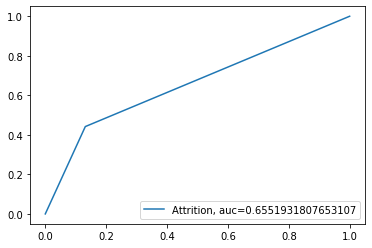

In [104]:
plt.plot(fpr,tpr,label='Attrition, auc='+str(auc))
plt.legend(loc=4)
plt.show()


In [105]:
#confusion matrix
sklearn.metrics.confusion_matrix(y_test,y_pred)

array([[218,  33],
       [ 24,  19]], dtype=int64)

In [106]:
from sklearn import metrics
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp2 = pd.Series({'Model': " Decision Tree with ENTROPY ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})
model=models_report.append(tmp2,ignore_index=True)
model

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with ENTROPY,0.655193,0.365385,0.44186,0.806122,0.285617


# GRID SEARCH CV

In [34]:
# Set the parameters for grid search
grid_search_parameters = {'criterion':['gini','entropy'],
                          'min_samples_split':[2],
                          'max_depth': [None,2, 3],
                         'min_samples_leaf': [1,5],
                          'max_leaf_nodes':[None],
                         }

In [35]:
gscv=sklearn.model_selection.GridSearchCV(DecisionTreeClassifier(),grid_search_parameters,cv=10)
gscv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [36]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [37]:
y_pred1=gscv.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
tn,fp,fn,tp=confusion_matrix(y_test,y_pred1).ravel()
tn,fp,fn,tp

0.8469387755102041
[[249   2]
 [ 43   0]]


(249, 2, 43, 0)

In [38]:
#with best params
from sklearn.tree import DecisionTreeClassifier
new_dtc=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=None,max_depth=2,min_samples_leaf=1,
                               min_samples_split=2,)
new_dtc.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
y_pred2=new_dtc.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8469387755102041

In [41]:
confusion_matrix(y_test,y_pred2)

array([[249,   2],
       [ 43,   0]], dtype=int64)

In [77]:
col=['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model2=pd.DataFrame(columns=col)
score=pd.Series({'Model': " Decision Tree with GINI ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred2),
                 'Precision Score': metrics.precision_score(y_test, y_pred2),
                 'Recall Score': metrics.recall_score(y_test, y_pred2),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred2),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred2)})
model11=model2.append(score,ignore_index=True)
model11

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with GINI,0.496016,0.0,0.0,0.846939,-0.013172


# RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [80]:
rf = RandomForestClassifier(n_estimators=10)
model_rf = rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

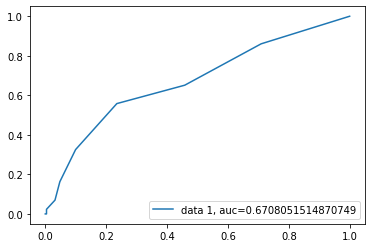

In [81]:
y_pred_proba = model_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [82]:
mp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_rf1_report = models_report.append(tmp3, ignore_index = True)
model_rf1_report


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier using Randomized Sea...,0.509636,0.5,0.023256,0.853741,0.031858


# RANDOM FOREST GRID SEARCH

In [83]:
grid_search_parameters = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [84]:
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()

model_RF_Grid = GridSearchCV(classifier, grid_search_parameters,cv = 10)
model_RF_Grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [85]:
model_RF_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [86]:
test_pred = model_RF_Grid.predict(x_test)
cc = accuracy_score(y_test,test_pred)
print("Accuracy is",cc)

Accuracy is 0.8571428571428571


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[243,  40],
       [  8,   3]], dtype=int64)

In [88]:
tmp2 = pd.Series({'Model': " Random Forest with Grid Search ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})

model_rf1_report_gs = models_report.append(tmp2, ignore_index = True)
model_rf1_report_gs

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest with Grid Search,0.518947,0.272727,0.069767,0.836735,0.054789


# RANDOM SEARCH WITH CROSS VALIDATION

In [89]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators =[int(x) for x in np.linspace(start = 1,stop = 5,num = 5)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True]

In [90]:
# Create Random Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [91]:
rf_Random = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = random_grid,n_iter = 10,cv = 5,
                               random_state =42 )
rf_Random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [92]:
rf_Random.best_params_

{'n_estimators': 4,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 3,
 'bootstrap': True}

In [93]:
rf_Random.best_score_

0.8392751532636133

In [94]:
# BUild randomsearchcv using rf_Random.best_params
rf = RandomForestClassifier(n_estimators=5,min_samples_split=5,min_samples_leaf=4,max_features='auto',max_depth=4,
                           bootstrap=True)
model_rand = rf.fit(x_train,y_train)
y_pred = model_rand.predict(x_test)

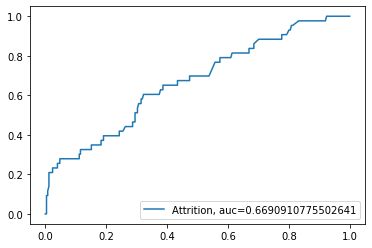

In [95]:
y_pred_proba = model_rand.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Attrition, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [96]:
tmp3 = pd.Series({'Model': " Random Forest Classifier using Randomized SearchCV ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})

model_rf1_report_rs = models_report.append(tmp3, ignore_index = True)
model_rf1_report_rs

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier using Randomized Sea...,0.54452,0.8,0.093023,0.863946,0.140477


# BAGGING

In [52]:
best_model = rf_Random.best_estimator_
best_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(best_model, random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=5,
                                                        min_weight_fraction_leaf=0.0,
        

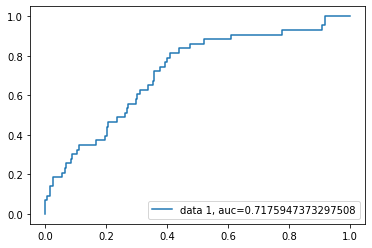

In [54]:
y_pred_proba = bagging.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [55]:
test_pred_bag = bagging.predict(x_test)

tmp2 = pd.Series({'Model': " Random Forest with BaggingClassifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_bag)})

model_bag_report = models_report.append(tmp2, ignore_index = True)
model_bag_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest with BaggingClassifier,0.511628,1.0,0.023256,0.857143,0.039066


# BOOSTING ADABOOST CLASSIFIER

In [56]:
adb = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
mod_boost = adb.fit(x_train,y_train)

In [57]:
mod_pred = adb.predict(x_test)
adb.score(x_test,y_test)

0.8537414965986394

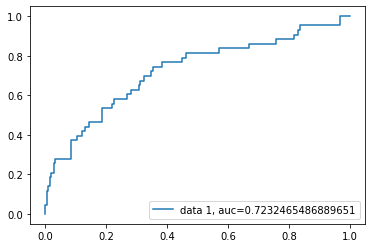

In [58]:
y_pred_proba = mod_boost.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [59]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test,mod_pred),
                 'Precision Score': metrics.precision_score(y_test,mod_pred),
                 'Recall Score': metrics.recall_score(y_test,mod_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,mod_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,mod_pred)})

model_adb_report = models_report.append(tmp1, ignore_index = True)
model_adb_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.615631,0.5,0.27907,0.853741,0.283089


# XGBOOST CLASSIFIER

In [62]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

import itertools

In [63]:
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)

[01:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [64]:
test_pred = xg_model.predict(x_test)
test_accuracy = accuracy_score(y_test,test_pred)
print("Test Accuracy: %.2f%%" %(test_accuracy*100))

Test Accuracy: 85.03%


In [65]:
tmp1 = pd.Series({'Model': " XGBoost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test,test_pred),
                 'Precision Score': metrics.precision_score(y_test,test_pred),
                 'Recall Score': metrics.recall_score(y_test,test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,test_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,test_pred)})

model_xgb = models_report.append(tmp1, ignore_index = True)
model_xgb

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,XGBoost Classifier,0.575095,0.470588,0.186047,0.85034,0.200396


# FEATURE IMPORTANCE

In [66]:
print(xg_model.feature_importances_)

[0.02288902 0.01161251 0.01772893 0.01356767 0.01297882 0.0205071
 0.01499515 0.02156882 0.01439985 0.03147376 0.01850512 0.02379566
 0.01373696 0.01989548 0.01605522 0.03088823 0.01525444 0.00740888
 0.02375809 0.01990855 0.00678948 0.02541682 0.         0.01454758
 0.0229031  0.00865795 0.02071707 0.00205352 0.01786133 0.0143364
 0.02080726 0.01177445 0.01796986 0.01994794 0.02136689 0.02099217
 0.04896085 0.00774991 0.         0.         0.01976239 0.
 0.02147063 0.         0.02674956 0.02741916 0.02222989 0.0213577
 0.01768701 0.02218418 0.00874378 0.02349545 0.         0.0108249
 0.0101985  0.01434071 0.02070485 0.01981487 0.00343706 0.00762768
 0.01773951 0.0104313 ]


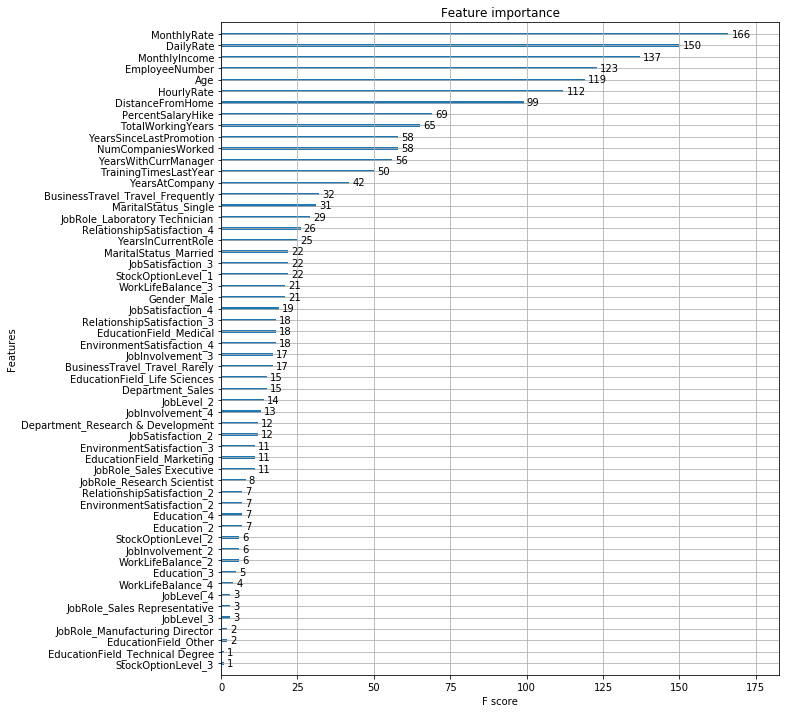

In [67]:
fig, ax = plt.subplots(figsize = (10,12))
#  visualize feature importance using plot_importance()
plot_importance(xg_model, ax)

In [68]:
# Feature importance can be used for feature selection using SelectFromModel

from sklearn.feature_selection import SelectFromModel
from numpy import sort
# features that have an importance that is greater than or equal to the threshold value are kept , 
# while others are discarded

# The threshold value to use for feature selection
featrure_importance = sort(xg_model.feature_importances_)

In [69]:
# Select features using threshold
for each_threshold in featrure_importance:
    selection = SelectFromModel(xg_model,threshold=each_threshold,prefit=True)
    

In [70]:
#Reduce x_train  only to the selected feature
selected_feature_x_train = selection.transform(x_train)
# Creating an object instance of XGBCLassifier
selection_model = XGBClassifier()
# Create a Train model
selection_model.fit(selected_feature_x_train,y_train)
# Reduce x_test only to the selected feature
selected_feature_x_test = selection.transform(x_test)

[01:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
# Predict using the test value of the selected feature
predictions = selection_model.predict(selected_feature_x_test)
#Checking the accuracy of our model
accuracy = accuracy_score(y_test,predictions)
print("Threshold=%.5f, Number of Features=%d, Model Accuracy: %.2f%%" 
      % (each_threshold,selected_feature_x_train.shape[1],accuracy*100))

Threshold=0.04896, Number of Features=1, Model Accuracy: 85.37%


In [72]:
tmp1 = pd.Series({'Model': " XGBoost Classifier with Feature Selection ",
                 'ROC Score' : metrics.roc_auc_score(y_test,predictions),
                 'Precision Score': metrics.precision_score(y_test,predictions),
                 'Recall Score': metrics.recall_score(y_test,predictions),
                 'Accuracy Score': metrics.accuracy_score(y_test,predictions),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,predictions)})

model_xgb_report = models_report.append(tmp1, ignore_index = True)
model_xgb_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,XGBoost Classifier with Feature Selection,0.5,0.0,0.0,0.853741,0.0


In [73]:
# We can also evaluate our models using cross-validation.
# Create a KFold object
kfold = KFold(n_splits=40,random_state=0)
# Create an object instance of XGBClassifier
xg_model_with_kfold = XGBClassifier()

In [74]:
cv_results = cross_val_score(xg_model_with_kfold,x_train,y_train,cv=kfold, verbose = True)
print("Mean Accuracy: %.2f%% Standard Deviation %.2f%%"
     % (cv_results.mean()*100,cv_results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[01:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.0s finished


In [75]:
tmp1 = pd.Series({'Model': " XGBoost Classifier with Kfold ",
                 'ROC Score' : metrics.roc_auc_score(y_test,predictions),
                 'Precision Score': metrics.precision_score(y_test,predictions),
                 'Recall Score': metrics.recall_score(y_test,predictions),
                 'Accuracy Score': metrics.accuracy_score(y_test,predictions),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,predictions)})

model_xgb_report_kf = models_report.append(tmp1, ignore_index = True)
model_xgb_report_kf

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,XGBoost Classifier with Kfold,0.5,0.0,0.0,0.853741,0.0


In [107]:
# Comparison of Models of Different Algorithm  based on criterion and max_features

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model,model11,model_rf1_report,
                            model_rf1_report_gs,model_rf1_report_rs,model_bag_report,
                            model_adb_report,model_xgb,model_xgb_report], ignore_index = True)
model_rf.head(9)

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with ENTROPY,0.655193,0.365385,0.441860,0.806122,0.285617
1,Decision Tree with GINI,0.496016,0.000000,0.000000,0.846939,-0.013172
2,Random Forest Classifier using Randomized Sea...,0.509636,0.500000,0.023256,0.853741,0.031858
3,Random Forest with Grid Search,0.518947,0.272727,0.069767,0.836735,0.054789
4,Random Forest Classifier using Randomized Sea...,0.544520,0.800000,0.093023,0.863946,0.140477
5,Random Forest with BaggingClassifier,0.511628,1.000000,0.023256,0.857143,0.039066
6,Adaboost Classifier,0.615631,0.500000,0.279070,0.853741,0.283089
7,XGBoost Classifier,0.575095,0.470588,0.186047,0.850340,0.200396
8,XGBoost Classifier with Feature Selection,0.500000,0.000000,0.000000,0.853741,0.000000
